# MATH7002 Advanced Statistical methods
## Worksheet 12

1. The file `seizures.csv` contains the number of seizures per day for an epileptic patient. It is thought that they may have multiple enduring states of the disease; which have differing seizure frequencies.

a. Fit a single Poisson distribution as a baseline.

In [1]:
serizures = read.csv("seizures.csv")

In [38]:
serizures

Seizures
<int>
0
3
0
0
0
0
1
1
0


In [3]:
data = serizures$Seizures

In [5]:
# Conclusion: There exists hidden states: two states, three states, four states. 

In [6]:
model = glm(data~1, family = poisson())

In [8]:
mu = exp(coef(model))

In [9]:
mu
# Conclusion: If our data follows the Poisson distribution, this 0.66 is the value of the mu, which means seizures happens 
# 0.66 times per day. 

(Intercept) 
  0.6617647

b. Fit independent two state mixture of Poissons. Compare to (a).

In [11]:
library(depmixS4)

Loading required package: nnet

Loading required package: MASS

Loading required package: Rsolnp

Loading required package: nlme



In [14]:
# Because it is independent, so it is Poission mixture model 
m1.2 = mix(data~1, data = serizures, family = poisson(), nstates = 2)
f1.2 = fit(m1.2)
summary(f1.2)
exp(summary(f1.2))

converged at iteration 497 with logLik: -227.1345 
Mixture probabilities model 
      pr1       pr2 
0.3264209 0.6735791 

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1       0.3086598
St2      -1.1312792
Mixture probabilities model 
      pr1       pr2 
0.3264209 0.6735791 

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1       0.3086598
St2      -1.1312792


,Re1.(Intercept)
St1,1.3615990
St2,0.3226203


c. Fit two, three and four state dependent Poisson models (Hidden Markov Models). Which model of all five fit is the best by AIC? By BIC?

In [10]:
# x1, x2 ,x3 
# P(x2|x1) = 0.4  
# P(x2|x3) = 0.1 
# These transition probability is not zero that means these multiple-state Poisson model are dependent! 

In [25]:
f4@message

[1] "Log likelihood converged to within tol. (relative change)"

In [18]:
m2 = depmix(Seizures~1, data = serizures, family = poisson(), nstates = 2)
f2 = fit(m2)

converged at iteration 84 with logLik: -211.0729 


In [20]:
m3 = depmix(Seizures~1, data = serizures, family = poisson(), nstates = 3)
f3 = fit(m3)

converged at iteration 161 with logLik: -208.094 


In [22]:
m4 = depmix(Seizures~1, data = serizures, family = poisson(), nstates = 4)
f4 = fit(m4)

converged at iteration 245 with logLik: -204.3774 


In [26]:
# f1.2 Poisson mixture model 
sapply(list(f1.2,f2,f3,f4), logLik)

[1] -227.1345 -211.0729 -208.0940 -204.3774

In [27]:
sapply(list(f1.2,f2,f3,f4), AIC)

[1] 460.2690 432.1459 438.1880 446.7548

In [28]:
sapply(list(f1.2,f2,f3,f4), BIC)

[1] 470.2234 448.7365 474.6873 509.7991

In [29]:
# Conclusion: Two state HMM is the best one! 

d. For the best model (by AIC) plot the Posterior states.

Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”
Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”


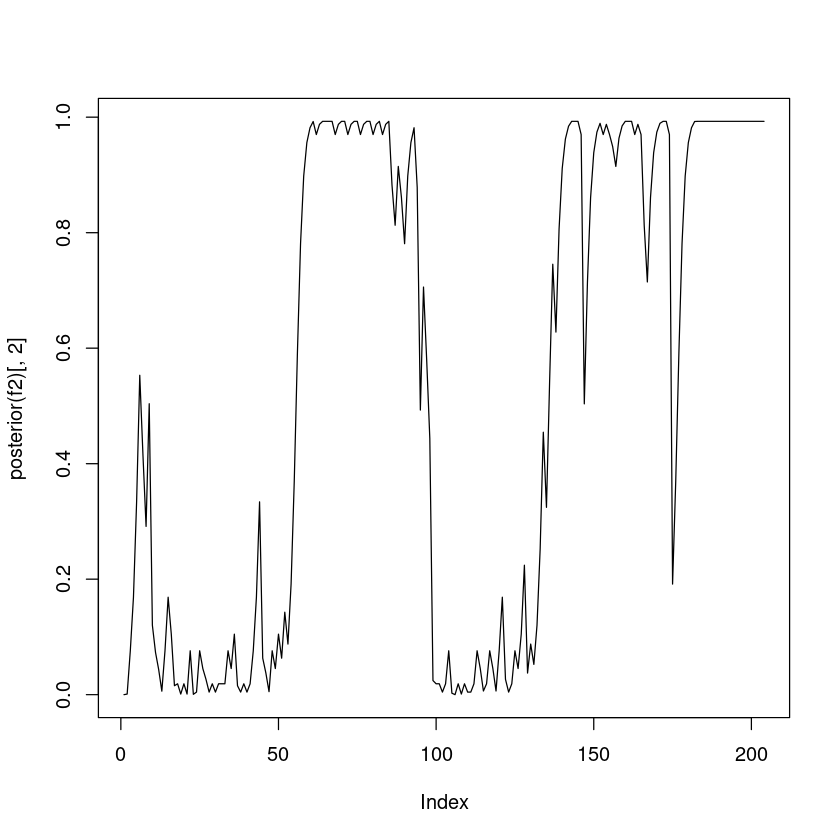

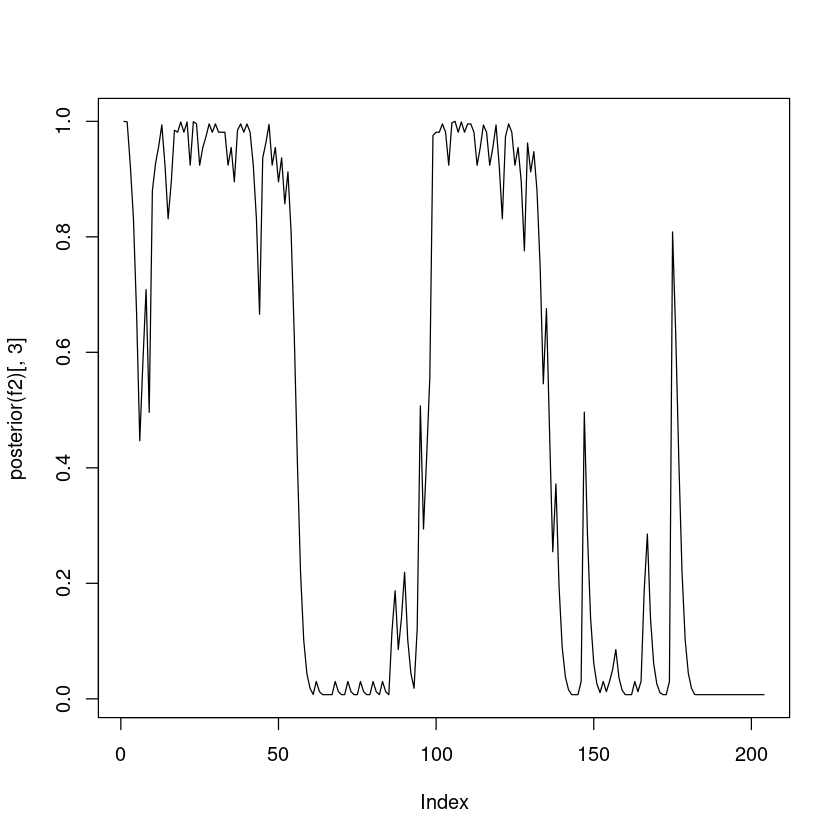

In [37]:
plot(posterior(f2)[,2], type = "l")
plot(posterior(f2)[,3], type = "l")

2. For this question we use a slightly different version of the Old Faithful data. It is called `geyser` in the MASS library.

a. Fit a two state independence *Gaussian* model to the waiting times. You will need to use `family=gaussian()`. 

In [39]:
require(MASS)

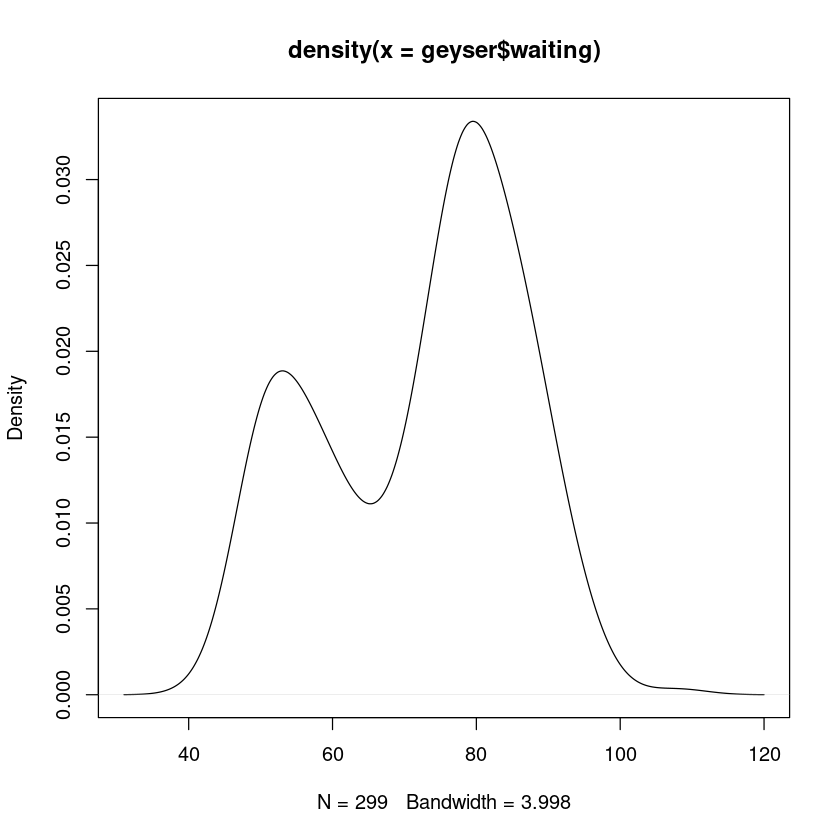

In [40]:
plot(density(geyser$waiting))

b. Fit a two state Gaussian hidden Markov model to Waiting times.

In [49]:
# m1 is Gaussian Mixture model 
m1 = mix(waiting~1, data = geyser, family = gaussian(), nstates = 2)
f1 = fit(m1)
summary(f1)

converged at iteration 60 with logLik: -1157.542 
Mixture probabilities model 
      pr1       pr2 
0.3076837 0.6923163 

Response parameters 
Resp 1 : gaussian 
    Re1.(Intercept)   Re1.sd
St1        54.20539 4.954173
St2        80.36250 7.505592


In [50]:
f1@message

[1] "Log likelihood converged to within tol. (relative change)"

In [51]:
# m2 is the hidden markov model 
m2 = depmix(waiting~1, data = geyser, family = gaussian(), nstates = 2)
f2 = fit(m2)
summary(f2)

converged at iteration 35 with logLik: -1092.399 
Initial state probabilities model 
pr1 pr2 
  0   1 

Transition matrix 
        toS1  toS2
fromS1 0.000 1.000
fromS2 0.776 0.224

Response parameters 
Resp 1 : gaussian 
    Re1.(Intercept) Re1.sd
St1          59.151  9.183
St2          82.476  6.214


c. Compare using likelihood ratio test, AIC and BIC

In [47]:
# test for nested model 
# HMM is the dynamical version of Mixture model 
# Mixture model is a special case of HMM, why? Because if the transition matrix of HMM is 1 or 0. 
# So HMM is much more complex than the GMM! 
# So we call GMM is a nested model for HMM! 
# GMM is a subset/special model for HMM! 
# Log-likelihood ratio test is used to test the statistically significant between these nested models. 
# H0/null hypothesis is : the improvement of HMM is not statistically significant! That means the improvement of HMM is not obvious!
# If the p value of Log-likelihood ratio < 0.05, that means we should reject H0, that means, the improvement of HMM is 
# statistically significant! We should use HMM! 

In [52]:
llratio(f2,f1)

log Likelihood ratio (chi^2): 130.285 (df=2), p=0.

In [53]:
# Conclusion : We should use the HMM because it is much more powerful! 

d. For the HMM plot the posterior probability of being in the state with the short average waiting times.    

## Comments: HMM is better than GMM because we reject the H0. 

Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”


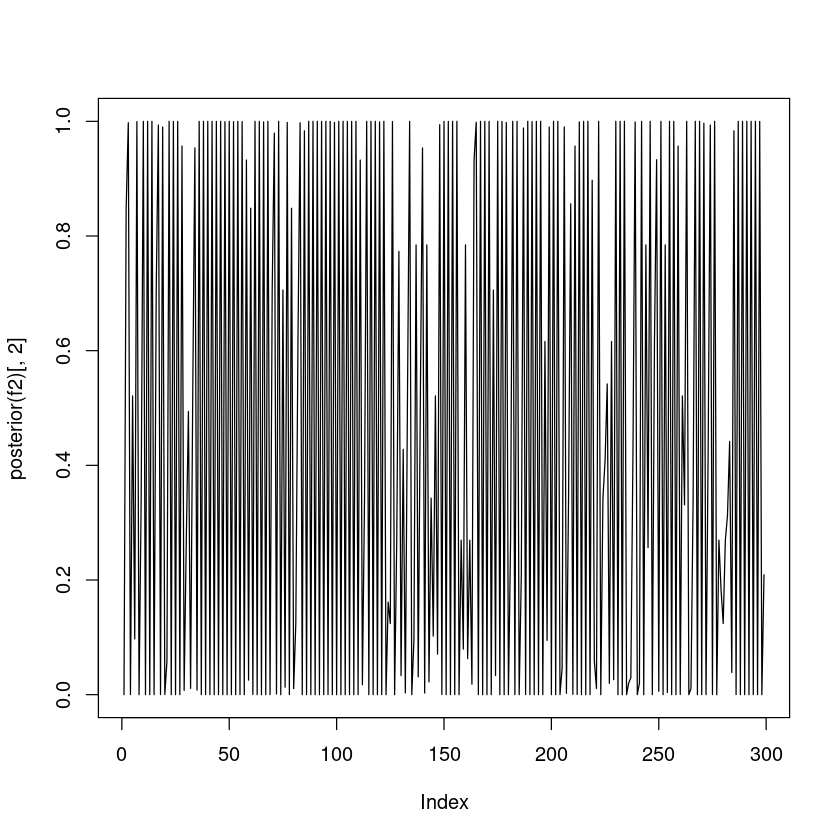

In [58]:
# Short time waiting time 
plot(posterior(f2)[,2], type = "l")